# STAT207 Final Project - Analyzing Credit Card Customers

YOUR NAMES: Jier Miao

Analysis Credit Card Customers

## 1. Introduction

I got rejected three times from applying credit card, so I'm wondering the background about each credit card customers.

For Descriptive Analytics research question set, I will first create a side-by-side boxplots that visualizes the relationship between Education_Level, Credit_Limit, and Marital_Status. Then I will use a groupby. describe to show the set of summary statistics.

For inference reserarch question, I'll set a condition and test the hyposthesis of whether 𝜇G−𝜇U equal or not equal to 0.𝜇G reperents the mean amount of credits left for use for the people who have college degree or higher and 𝜇U reperents the mean amount of credits left for use for the people who do not have a college degree.

For linear regressopm research question set, I'll fit a model to check if there is a linear relationship between Credit_Limit and total_Revolving_Balance, Total_Trans_Amt, Income_Category, Gender.

For logistic regression research question set, I'll check if therse is a linear relationship between the log-odds of the success level of income category and Credit_Limit+Dependent_count+Total_Trans_Amt +Customer_Age. I'll also determined what varible should I include to build a parismonious model.

I want to use these research question set to find the association between their background and attribute the credit cards they have.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, norm, f
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


In [2]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df.dropna()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## 2. Descriptive Analytics

“What is the relationship between Education_Level and Credit_Limit and Marital_Status in this dataset

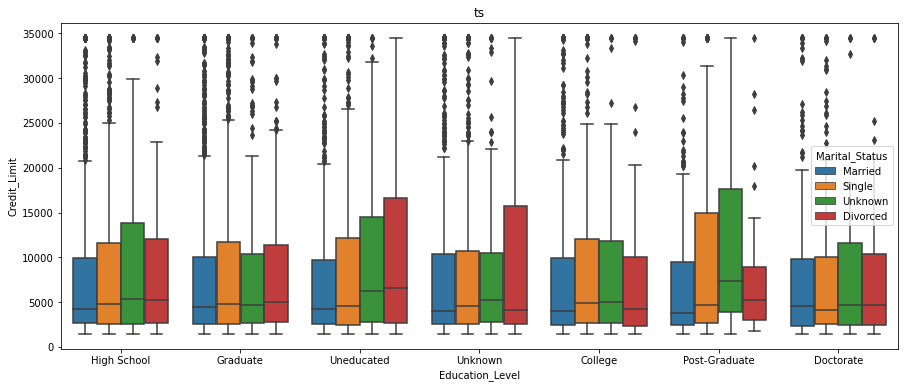

In [4]:
plt.figure(figsize = (15,6))
sns.boxplot(x="Education_Level", y='Credit_Limit', hue = 'Marital_Status',data=df)
plt.title('ts')
plt.show()

I found that the divoced people who are uneducated have the heighest credit limit, and the married people whoa are unedcated have the lowest credit limit. 

In [5]:
df[['Education_Level','Credit_Limit','Marital_Status']].groupby(['Education_Level', 'Marital_Status']).describe()

Credit_Limit                              \
                                      count          mean           std   
Education_Level Marital_Status                                            
College         Divorced               86.0   8430.098837   9408.547260   
                Married               467.0   8208.167666   9041.073754   
                Single                386.0   9316.302591   9703.510653   
                Unknown                74.0   8691.074324   8714.315186   
Doctorate       Divorced               36.0   9415.433333   9921.919610   
                Married               205.0   8253.384390   8702.379698   
                Single                182.0   8212.347253   8826.288017   
                Unknown                28.0   9601.185714  11146.314126   
Graduate        Divorced              225.0   9178.315556   9525.853608   
                Married              1479.0   8094.097904   8532.367656   
                Single               1197.0   9002.799749   9468.598591   
                Unknown               227.0   8731.808811   9218.982182   
High School     Divorced              128.0   9035.840625   9179.360373   
                Married               949.0   7987.965753   8293.210448   
                Single                782.0   9035.860614   9459.722101   
                Unknown               154.0   9872.160390  10067.119719   
Post-Graduate   Divorced               41.0   7841.926829   7601.037582   
                Married               243.0   7647.574074   8299.318598   
                Single                189.0   9965.661905  10292.969006   
                Unknown                43.0  11853.293023  10756.624290   
Uneducated      Divorced              136.0  11053.661029  10287.188460   
                Married               656.0   7968.610823   8432.401294   
                Single                586.0   9201.179863   9669.818575   
                Unknown               109.0  10192.402752   9406.313125   
Unknown         Divorced               96.0   9268.094792   9342.773550   
                Married               688.0   8274.181250   9061.719032   
                Single                621.0   8497.940741   8898.932995   
                Unknown               114.0   9117.961404   9314.065790   

                                                                            
                                   min      25%     50%       75%      max  
Education_Level Marital_Status                                              
College         Divorced        1438.3  2352.00  4212.0  10045.25  34516.0  
                Married         1438.3  2429.50  4065.0   9970.00  34516.0  
                Single          1438.3  2696.25  4938.5  12003.00  34516.0  
                Unknown         1438.3  2725.75  5071.5  11781.00  34516.0  
Doctorate       Divorced        1438.3  2479.50  4667.5  10371.50  34516.0  
                Married         1438.3  2372.00  4552.0   9843.00  34516.0  
                Single          1438.3  2539.50  4132.0  10013.25  34516.0  
                Unknown         1438.3  2403.00  4689.5  11552.25  34516.0  
Graduate        Divorced        1438.3  2782.00  5065.0  11343.00  34516.0  
                Married         1438.3  2550.00  4473.0  10065.50  34516.0  
                Single          1438.3  2537.00  4745.0  11671.00  34516.0  
                Unknown         1438.3  2708.50  4663.0  10344.00  34516.0  
High School     Divorced        1438.3  2716.25  5277.0  12026.50  34516.0  
                Married         1438.3  2675.00  4277.0   9924.00  34516.0  
                Single          1438.3  2520.00  4804.0  11602.00  34516.0  
                Unknown         1438.3  2599.00  5381.5  13824.25  34516.0  
Post-Graduate   Divorced        1752.0  3028.00  5216.0   8917.00  34516.0  
                Married         1438.3  2479.50  3773.0   9519.50  34516.0  
                Single          1438.3  2634.00  4688.0  14895.00  34516.0  
           

For people with college degrees, those who are single have the heighest mean of creidit limit, and the people who are married have the lowest mean of credit limit. For people with a graduate degreee, the people who are divorced have the heighest mean of credit limit, and the people who are married have the lowest mean of credit limit.

Based on the plot and summary statistics, we found out that divorced people have a higher median and mean credit limit than people who are married. We also found out there is no significant relationship between uducational level and mean and median credit limit.

## 3. Inference

Is there an association between Education_Level and Avg_Open_To_Buy for credit card holders in America.

Evaluate these hypotheses using a p-value and  𝛼=0.05

Condition for inference

1. The sample of Education_Level of people who have a college degree or higher is randomly collected from the population of all bank's customers.

2. The sample size n = 5108 < 10% of the population of all bank's customers.

3. The sample size of Graduate is n = 5108 >30

4. The sample of Education_Level of people who don't have a college degree is randomly collected from the population of all bank's customers.

5. The sample size of Undeucated is 5019 > 10% of the population of all bank's customers.

6. The sample size of Undedcated is n = 5019 > 30.

7. We should also check that the graduate and undecuated were collected independently in this study.

𝐻0:𝜇G−𝜇U=0 

𝐻𝐴:𝜇G−𝜇U≠0

In [45]:
df['College_or_no_college']=df['Education_Level'].map({'Graduate': 'college', 'High School': 'no college', 'Unknown': 'no college', 'Uneducated': 'no college', 'College': 'college','Post-Graduate':'college', 'Doctorate': 'college'})

In [7]:
df['College_or_no_college'].value_counts()

college       5108
no college    5019
Name: College_or_no_college, dtype: int64

In [8]:
nG=5108
nU =5019

In [9]:
sample_mean_G=df[df['College_or_no_college']=='college']['Avg_Open_To_Buy'].mean()
sample_mean_U=df[df['College_or_no_college']=='no college']['Avg_Open_To_Buy'].mean()
sample_std_G=df[df['College_or_no_college']=='college']['Avg_Open_To_Buy'].std()
sample_std_U=df[df['College_or_no_college']=='no college']['Avg_Open_To_Buy'].std()
se=np.sqrt(sample_std_G**2/nG+sample_std_U**2/nU)

In [10]:
test_stat=((sample_mean_G-sample_mean_U)-0)/se
print('Test Statistic', test_stat)

Test Statistic -0.18682483544501607


In [11]:
p_value=2*(1-t.cdf(np.abs(test_stat), df=186))
print('p-value', p_value)

p-value 0.8520015942193835


Because the  𝑝−𝑣𝑎𝑙𝑢𝑒≈0.9061736369388975>𝛼=.05 , we failed to reject the null hypothesis. Which means we don't have a sufficient evidence to suggest that there is an association between the average open level to buy of education level of people who have a college degree or higher and people who don't have a college degree in US.

## 4. Linear Regression

Is there a linear relationship
between credit limit and total_revolving_bal, total trans amount,income category, and gender in the sample

In [12]:
full_model = smf.ols('Credit_Limit ~ Total_Revolving_Bal  + Total_Trans_Amt + Income_Category +Gender', 
               data=df).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Credit_Limit   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     715.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:14:26   Log-Likelihood:            -1.0441e+05
No. Observations:               10127   AIC:                         2.088e+05
Df Residuals:                   10118   BIC:                         2.089e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.624e+04    402.429     40.355      0.000    1.55e+04     1.7e+04
Income_Category[T.$40K - $60K]    -1.346e+04    353.418    -38.087      0.000   -1.42e+04   -1.28e+04
Income_Category[T.$60K - $80K]    -8912.0804    332.173    -26.830      0.000   -9563.206   -8260.955
Income_Category[T.$80K - $120K]   -3884.4538    327.172    -11.873      0.000   -4525.775   -3243.133
Income_Category[T.Less than $40K] -1.469e+04    384.448    -38.199      0.000   -1.54e+04   -1.39e+04
Income_Category[T.Unknown]        -8842.6791    429.667    -20.580      0.000   -9684.912   -8000.446
Gender[T.M]                        1291.7163    266.359      4.850      0.000     769.600    1813.833
Total_Revolving_Bal                   0.1843      0.089      2.075      0.038       0.010       0.359
Total_Trans_Amt                       0.4328      0.021     20.309      0.000       0.391       0.475
==============================================================================
Omnibus:                     1196.298   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1899.345
Skew:                           0.841   Prob(JB):                         0.00
Kurtosis:                       4.294   Cond. No.                     6.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{Credit_Limit}$= 1.624e+04 -1.346e+04	*Income_Category[T. 40𝐾− 60K] -8912.0804*[Income_Category[T. 60𝐾− 80K]]-3884.4538	*Income_Category[T. 80𝐾− 120K]-1.469e+04*Income_Category[T.Less than 40K]-8842.6791	*ncome_Category[T.Unknown]+1291.7163*Gender[T.M]+0.1843*Total_Revolving_Bal + 0.4328*Total_Trans_Amt

**Linearity Condition:** This condition is not met because there are more points above the axis on the left.

**Constant Variance of Residuals Condition:** This condition is roughly met because the spread doesn't really change from left to right except the left little bit.

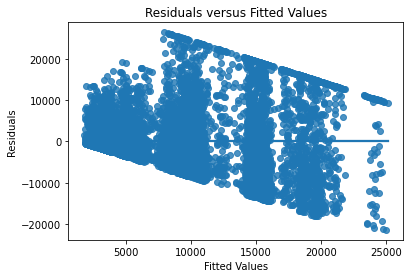

In [13]:
sns.regplot(x=full_model.fittedvalues, y=full_model.resid, ci=None)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

**Normally Distributed Residuals and Mean of 0 Condition:** This condition looks like it's mostly met as the histogram is mostly symmetric, unimodal, and centered at 0.

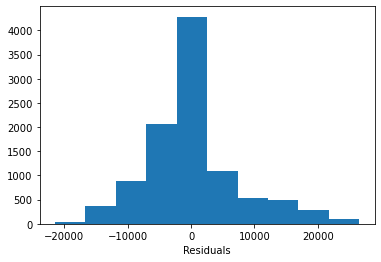

In [14]:
plt.hist(full_model.resid)
plt.xlabel('Residuals')
plt.show()

Independence of Residuals Condition: The sample is randomly selected.

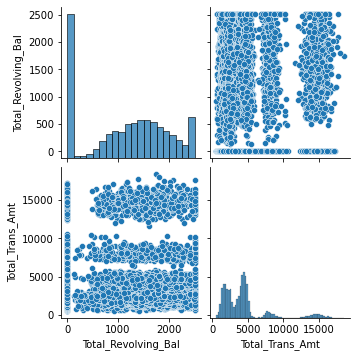

In [15]:
sns.pairplot(df[['Total_Revolving_Bal', 'Total_Trans_Amt']])
plt.show()

**No-Multicollinearity Condition:** The condition is met because there is no linear relationship.

The r-squared is 0.361 which I think it's low.

if we want to predict a male who's income is 80k - 120k

𝐶𝑟𝑒𝑑𝑖𝑡𝐿𝑖𝑚𝑖𝑡^ = 1.624e+04 -1.346e+04 Income_Category[T. 40𝐾− 60K] -8912.0804[Income_Category[T. 60𝐾− 80K]]-3884.4538 Income_Category[T. 80𝐾− 120K]-1.469e+04Income_Category[T.Less than 40K]-8842.6791 ncome_Category[T.Unknown]+1291.7163Gender[T.M]+0.1843Total_Revolving_Bal + 0.4328Total_Trans_Amt

In [16]:
1.624*10**4 -3884.4538 + 1291.7163* 1+0.1972*10000+0.4328*300

15749.102500000003

All my slopes are significant because all of my p-values are below 0.05 which means all of them are non-zero.

there is a linear relationship between credit limit and total_revolving_bal, total trans amount,income category, and gender in the sample.

## 5. Logistic Regression

we would like to build a model that will make accurate predictions for new datasets. As a means of doing this, we will try out two logistic regression models and use the log-likelihood ratio test to evaluate which one of the models is a more parsimonious model. A parsimonious model will be less likely to overfit a model, and more likely to make accurate predictions with new data.

In [17]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,College_or_no_college
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,no college
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,college
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,college
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,no college
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,no college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,college
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,no college
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,no college
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,college


Gender. Credit_Limit.Total_Revolving_Bal.Avg_Open_To_Buy. Total_Trans_Amt

In [18]:
df['Above_or_below_120K']=df['Income_Category'].map({'Less than $40K': 'below120K', '$40K - $60K': 'below120K', '$60K - $80K': 'below120K', '$80K - $120K': 'below120K','Unknown': 'below120K', '$120K +': 'above120K'})

In [19]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [20]:
df['Above_or_below_120K'].value_counts()

below120K    9400
above120K     727
Name: Above_or_below_120K, dtype: int64

In [21]:
df['y'] = df['Above_or_below_120K'].map({'above120K': 1,'below120K': 0})
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,College_or_no_college,Above_or_below_120K,y
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.335,1144,42,1.625,0.061,0.000093,0.999910,no college,below120K,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1.541,1291,33,3.714,0.105,0.000057,0.999940,college,below120K,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.594,1887,20,2.333,0.000,0.000021,0.999980,college,below120K,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1.405,1171,20,2.333,0.760,0.000134,0.999870,no college,below120K,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.175,816,28,2.500,0.000,0.000022,0.999980,no college,below120K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.703,15476,117,0.857,0.462,0.000191,0.999810,college,below120K,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.804,8764,69,0.683,0.511,0.995270,0.004729,no college,below120K,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.819,10291,60,0.818,0.000,0.997880,0.002118,no college,below120K,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.535,8395,62,0.722,0.000,0.996710,0.003294,college,below120K,0


the training dataset is comprised of a random sample of 85% of the rows in our dataframe,
the test dataset is comprised of the remaining 15% of rows in the dataframe, and
we use a random state of 100.


In [22]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
 test_size=0.15,
random_state=100)


In [23]:
df_train

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,College_or_no_college,Above_or_below_120K,y
897,710370483,Existing Customer,39,F,4,College,Married,Less than $40K,Blue,31,...,0.772,1517,33,1.357,0.684,0.000308,0.99969,college,below120K,0
6477,768498258,Existing Customer,47,F,1,High School,Married,Unknown,Blue,41,...,0.800,4740,83,0.694,0.557,0.000175,0.99983,no college,below120K,0
2369,716624133,Existing Customer,56,M,1,Unknown,Married,$80K - $120K,Blue,36,...,0.702,1205,19,0.462,0.147,0.000096,0.99990,no college,below120K,0
8779,709984083,Existing Customer,43,F,3,Unknown,Single,Less than $40K,Blue,36,...,0.777,7930,90,0.607,0.333,0.000130,0.99987,no college,below120K,0
5093,778830933,Existing Customer,40,M,3,Graduate,Married,$80K - $120K,Blue,21,...,1.002,5308,78,0.773,0.576,0.000044,0.99996,college,below120K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,788868858,Existing Customer,54,M,2,Graduate,Married,Less than $40K,Blue,39,...,1.019,1658,32,1.462,0.932,0.000217,0.99978,college,below120K,0
79,710790258,Existing Customer,47,M,2,Graduate,Married,$80K - $120K,Blue,38,...,0.850,1334,35,0.400,0.066,0.000180,0.99982,college,below120K,0
8039,779916408,Existing Customer,39,F,4,Graduate,Single,Unknown,Blue,23,...,0.835,4934,70,0.628,0.000,0.000189,0.99981,college,below120K,0
6936,715009833,Existing Customer,51,F,1,High School,Married,Less than $40K,Blue,36,...,0.950,5149,90,0.636,0.556,0.000198,0.99980,no college,below120K,0


In [24]:
df_test

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,College_or_no_college,Above_or_below_120K,y
4250,718582158,Existing Customer,48,M,2,Unknown,Married,$120K +,Blue,35,...,0.705,4183,74,0.762,0.161,0.000567,0.999430,no college,above120K,1
5309,788407833,Existing Customer,49,F,4,Graduate,Single,Unknown,Blue,42,...,0.550,4025,79,0.881,0.083,0.000189,0.999810,college,below120K,0
7728,714060408,Existing Customer,57,F,3,High School,Single,Unknown,Blue,37,...,0.776,4210,82,0.907,0.525,0.000056,0.999940,no college,below120K,0
5282,795392433,Existing Customer,35,F,2,Uneducated,Single,Unknown,Blue,29,...,0.663,4651,69,0.568,0.000,0.000034,0.999970,no college,below120K,0
575,721379433,Existing Customer,44,M,4,Graduate,Married,$60K - $80K,Blue,28,...,0.695,1227,24,0.500,0.000,0.000201,0.999800,college,below120K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,787833333,Existing Customer,44,M,3,College,Unknown,$80K - $120K,Blue,35,...,1.027,1571,38,0.520,0.203,0.000056,0.999940,college,below120K,0
3461,717569283,Existing Customer,47,M,5,Doctorate,Single,Less than $40K,Blue,36,...,0.741,4252,70,0.591,0.150,0.000082,0.999920,college,below120K,0
6234,812406183,Attrited Customer,45,F,4,Unknown,Single,Less than $40K,Blue,40,...,0.605,2207,41,0.640,0.000,0.997630,0.002366,no college,below120K,0
8122,781137783,Attrited Customer,40,M,3,High School,Unknown,Less than $40K,Blue,33,...,0.818,2478,43,0.433,0.079,0.998080,0.001916,no college,below120K,0


# AIC

In [25]:
current_mod=smf.logit('y~Credit_Limit+Dependent_count+Total_Trans_Amt +Customer_Age',\
    data=df_train).fit()
current_mod.aic

Optimization terminated successfully.
         Current function value: 0.215219
         Iterations 7


3714.7839462213083

In [26]:
test_mod=smf.logit('y~Credit_Limit+Dependent_count+Total_Trans_Amt',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.216743
         Iterations 7


3739.0056112035086

In [27]:
test_mod=smf.logit('y~Credit_Limit+Dependent_count+Customer_Age',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.216063
         Iterations 7


3727.300433449862

In [28]:
test_mod=smf.logit('y~Dependent_count+Total_Trans_Amt +Customer_Age',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.256964
         Iterations 7


4431.373438989065

Because there was one "test model" that had an AIC score(3732.11) that was lower the AIC score of
the "current model" (3732.11), we: continue the algorithm.


Because the "test model" that deleted 'Total_Trans_Amt' from the current model had the lowest
AIC score (3732.11), then we permanently delete 'Total_Trans_Amt' from the current model
and move onto the next iteration.

In [29]:
test_mod=smf.logit('y~Dependent_count +Total_Trans_Amt ',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.258511
         Iterations 7


4456.011259082998

In [30]:
test_mod=smf.logit('y~Dependent_count +Customer_Age',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.257021
         Iterations 7


4430.351630109056

In [31]:
test_mod=smf.logit('y~Total_Trans_Amt +Customer_Age',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.257553
         Iterations 7


4439.523656519579

In [32]:
test_mod=smf.logit('y~Customer_Age+Total_Trans_Amt +Avg_Utilization_Ratio',\
    data=df_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.243094
         Iterations 8


4192.613720775125

Because there was a "test model" did not have an AIC score that was lower the AIC score of the
"current model" (3732.11), we STOP THE ALGORITHM.
Our final model is the current model which has deleted just Total_Trans_Amt.

In [33]:
mod_full=smf.logit('y~Credit_Limit+Dependent_count+Customer_Age',\
    data=df_train).fit()
mod_full.summary()

Optimization terminated successfully.
         Current function value: 0.216063
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8607
Model:                          Logit   Df Residuals:                     8603
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.1654
Time:                        20:14:28   Log-Likelihood:                -1859.7
converged:                       True   LL-Null:                       -2228.1
Covariance Type:            nonrobust   LLR p-value:                2.108e-159
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.3971      0.336    -16.064      0.000      -6.056      -4.739
Credit_Limit     9.696e-05   3.63e-06     26.683      0.000    8.98e-05       0.000
Dependent_count     0.0321      0.036      0.896      0.370      -0.038       0.102
Customer_Age        0.0322      0.006      5.203      0.000       0.020       0.044
===================================================================================
"""

The splope of Credit limit and customer age are significant because all of my p-values are below 0.05 which means all of them are non-zero.

In [34]:
mod_red = smf.logit('y~Credit_Limit+Customer_Age', data=df_train).fit()
mod_red.summary()

Optimization terminated successfully.
         Current function value: 0.216109
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8607
Model:                          Logit   Df Residuals:                     8604
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.1652
Time:                        20:14:28   Log-Likelihood:                -1860.1
converged:                       True   LL-Null:                       -2228.1
Covariance Type:            nonrobust   LLR p-value:                1.453e-160
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.2688      0.300    -17.534      0.000      -5.858      -4.680
Credit_Limit  9.729e-05   3.62e-06     26.897      0.000    9.02e-05       0.000
Customer_Age     0.0311      0.006      5.181      0.000       0.019       0.043
================================================================================
"""

$\begin{align}
H_0: \quad \mbox{Reduced Model is correct},\\
\\H_A: \quad \mbox{Reduced Model is incorrect because the missing 'Dependent_count' coefficient in Reduced Model is not zero}.\\
\end{align}$

In [35]:
mod_red.llf, mod_full.llf
mod_red.df_model, mod_full.df_model
# Extract log-likelihood function values 
# and model degrees of freedom from each model
llf_red, df_red = mod_red.llf, mod_red.df_model
llf_full, df_full = mod_full.llf, mod_full.df_model
# take differences
llr, dfdiff = -2*(llf_red - llf_full), df_full - df_red
# display results
pd.DataFrame({'-2*llf': [-2*llf_red, -2*llf_full, llr], 
              'df_model': [df_red, df_full, dfdiff]}, 
             index=['reduced model','full model', 'diff'])

,-2*llf,df_model
reduced model,3720.104628,2.0
full model,3719.300433,3.0
diff,0.804195,1.0


In [36]:
from scipy.stats import chi2
# summarize test results
print('-2*llr:', round(llr, 2), \
      ' df:', dfdiff, ' p-value:', \
      1 - chi2.cdf(llr, df=dfdiff))

-2*llr: 0.8  df: 1.0  p-value: 0.36984221154464625


because the p-value =0.36984221154464625 < a = 0.5, we reject the null hypothesis

There is sufficient evidence to suggest that the reduced model is not parsimonious because the missing 'Dependent_count' coefficient in Reduced Model is not zero.

In [37]:
phat_test = mod_full.predict(exog=df_test)
phat_test

4250    0.059901
5309    0.109458
7728    0.040431
5282    0.018535
575     0.060051
          ...   
674     0.036782
3461    0.054239
6234    0.024645
8122    0.022393
4695    0.239642
Length: 1520, dtype: float64

In [38]:
df_test['phat_test']=phat_test
df_test

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,College_or_no_college,Above_or_below_120K,y,phat_test
4250,718582158,Existing Customer,48,M,2,Unknown,Married,$120K +,Blue,35,...,4183,74,0.762,0.161,0.000567,0.999430,no college,above120K,1,0.059901
5309,788407833,Existing Customer,49,F,4,Graduate,Single,Unknown,Blue,42,...,4025,79,0.881,0.083,0.000189,0.999810,college,below120K,0,0.109458
7728,714060408,Existing Customer,57,F,3,High School,Single,Unknown,Blue,37,...,4210,82,0.907,0.525,0.000056,0.999940,no college,below120K,0,0.040431
5282,795392433,Existing Customer,35,F,2,Uneducated,Single,Unknown,Blue,29,...,4651,69,0.568,0.000,0.000034,0.999970,no college,below120K,0,0.018535
575,721379433,Existing Customer,44,M,4,Graduate,Married,$60K - $80K,Blue,28,...,1227,24,0.500,0.000,0.000201,0.999800,college,below120K,0,0.060051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,787833333,Existing Customer,44,M,3,College,Unknown,$80K - $120K,Blue,35,...,1571,38,0.520,0.203,0.000056,0.999940,college,below120K,0,0.036782
3461,717569283,Existing Customer,47,M,5,Doctorate,Single,Less than $40K,Blue,36,...,4252,70,0.591,0.150,0.000082,0.999920,college,below120K,0,0.054239
6234,812406183,Attrited Customer,45,F,4,Unknown,Single,Less than $40K,Blue,40,...,2207,41,0.640,0.000,0.997630,0.002366,no college,below120K,0,0.024645
8122,781137783,Attrited Customer,40,M,3,High School,Unknown,Less than $40K,Blue,33,...,2478,43,0.433,0.079,0.998080,0.001916,no college,below120K,0,0.022393


In [39]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

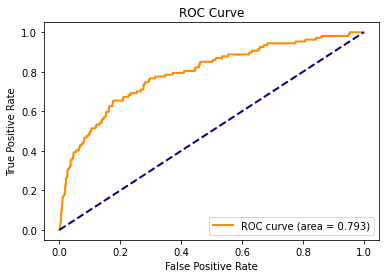

In [40]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

In [41]:
phat_test = mod_red.predict(exog=df_test)
phat_test

4250    0.060516
5309    0.104439
7728    0.039119
5282    0.018968
575     0.057380
          ...   
674     0.036154
3461    0.050052
6234    0.023408
8122    0.022079
4695    0.253426
Length: 1520, dtype: float64

In [42]:
df_test['phat_test']=phat_test
df_test

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,College_or_no_college,Above_or_below_120K,y,phat_test
4250,718582158,Existing Customer,48,M,2,Unknown,Married,$120K +,Blue,35,...,4183,74,0.762,0.161,0.000567,0.999430,no college,above120K,1,0.060516
5309,788407833,Existing Customer,49,F,4,Graduate,Single,Unknown,Blue,42,...,4025,79,0.881,0.083,0.000189,0.999810,college,below120K,0,0.104439
7728,714060408,Existing Customer,57,F,3,High School,Single,Unknown,Blue,37,...,4210,82,0.907,0.525,0.000056,0.999940,no college,below120K,0,0.039119
5282,795392433,Existing Customer,35,F,2,Uneducated,Single,Unknown,Blue,29,...,4651,69,0.568,0.000,0.000034,0.999970,no college,below120K,0,0.018968
575,721379433,Existing Customer,44,M,4,Graduate,Married,$60K - $80K,Blue,28,...,1227,24,0.500,0.000,0.000201,0.999800,college,below120K,0,0.057380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,787833333,Existing Customer,44,M,3,College,Unknown,$80K - $120K,Blue,35,...,1571,38,0.520,0.203,0.000056,0.999940,college,below120K,0,0.036154
3461,717569283,Existing Customer,47,M,5,Doctorate,Single,Less than $40K,Blue,36,...,4252,70,0.591,0.150,0.000082,0.999920,college,below120K,0,0.050052
6234,812406183,Attrited Customer,45,F,4,Unknown,Single,Less than $40K,Blue,40,...,2207,41,0.640,0.000,0.997630,0.002366,no college,below120K,0,0.023408
8122,781137783,Attrited Customer,40,M,3,High School,Unknown,Less than $40K,Blue,33,...,2478,43,0.433,0.079,0.998080,0.001916,no college,below120K,0,0.022079


In [43]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

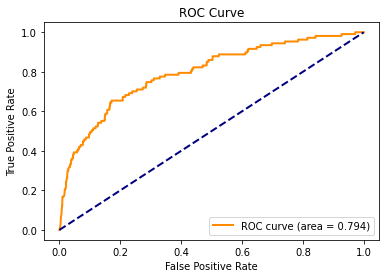

In [44]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

I would use reduced model because when auc on the reduced model is larger than the one in full model

In [46]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold       tpr       fpr
0       0.02  0.990654  0.937013
   threshold       tpr       fpr
0       0.03  0.915888  0.630573
   threshold       tpr       fpr
0       0.04  0.794393  0.406228
   threshold       tpr       fpr
0       0.05  0.747664  0.286624
   threshold       tpr       fpr
0       0.06  0.691589  0.230715
   threshold       tpr       fpr
0       0.07  0.654206  0.193206
   threshold      tpr       fpr
0       0.08  0.64486  0.170559
   threshold       tpr      fpr
0       0.09  0.607477  0.15782
   threshold       tpr       fpr
0        0.1  0.551402  0.141543
   threshold       tpr       fpr
0       0.11  0.523364  0.125265
   threshold       tpr       fpr
0       0.12  0.514019  0.112527
   threshold       tpr       fpr
0       0.13  0.495327  0.102619
   threshold      tpr       fpr
0       0.14  0.46729  0.096249
   threshold       tpr       fpr
0       0.15  0.457944 

 0.13 is the predictive probability  threshold tgat will give me tpr = 0.495327, fpr =   0.102619,  because the heighest tpr and lowest fpr has a good predictive probability threshold

 false positive rate is 0.102619 and true positive rate is 0.495327

We found that reduced model is better for predicting

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

Based on the plot and summary statistics, we found out that divorced people have a higher median and mean credit limit than people who are married. We also found out there is no significant relationship between educational level and mean and median credit limit. We also found the 𝑝−𝑣𝑎𝑙𝑢𝑒≈0.9061736369388975>𝛼=.05 , we failed to reject the null hypothesis. Which means we don't have sufficient evidence to suggest that there is an association between the average open level to buy or education level of people who have a college degree or higher and people who don't have a college degree in the US. We also found there is a linear relationship between credit limit and total_revolving_bal, total trans amount,income category, and gender in the sample. We found that There is sufficient evidence to suggest that the reduced model is not parsimonious because the missing 'Dependent_count ' coefficient in the Reduced Model is not zero.

If I were to conduct future work based on these analyses, I might want to learn more about what type of people can have a higher credit limit.